<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Converting_words_to_numbers%2C_Word_Embeddings_%7C_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

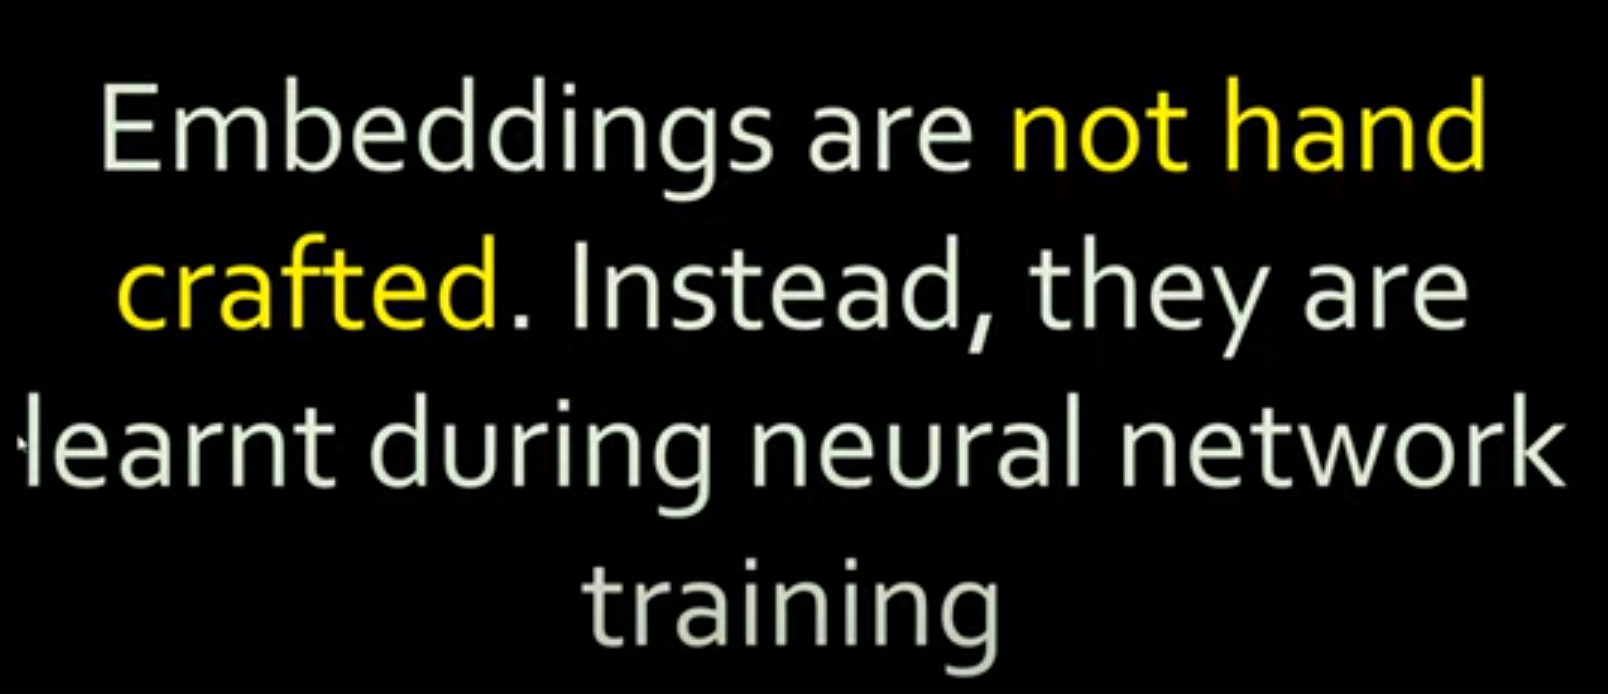

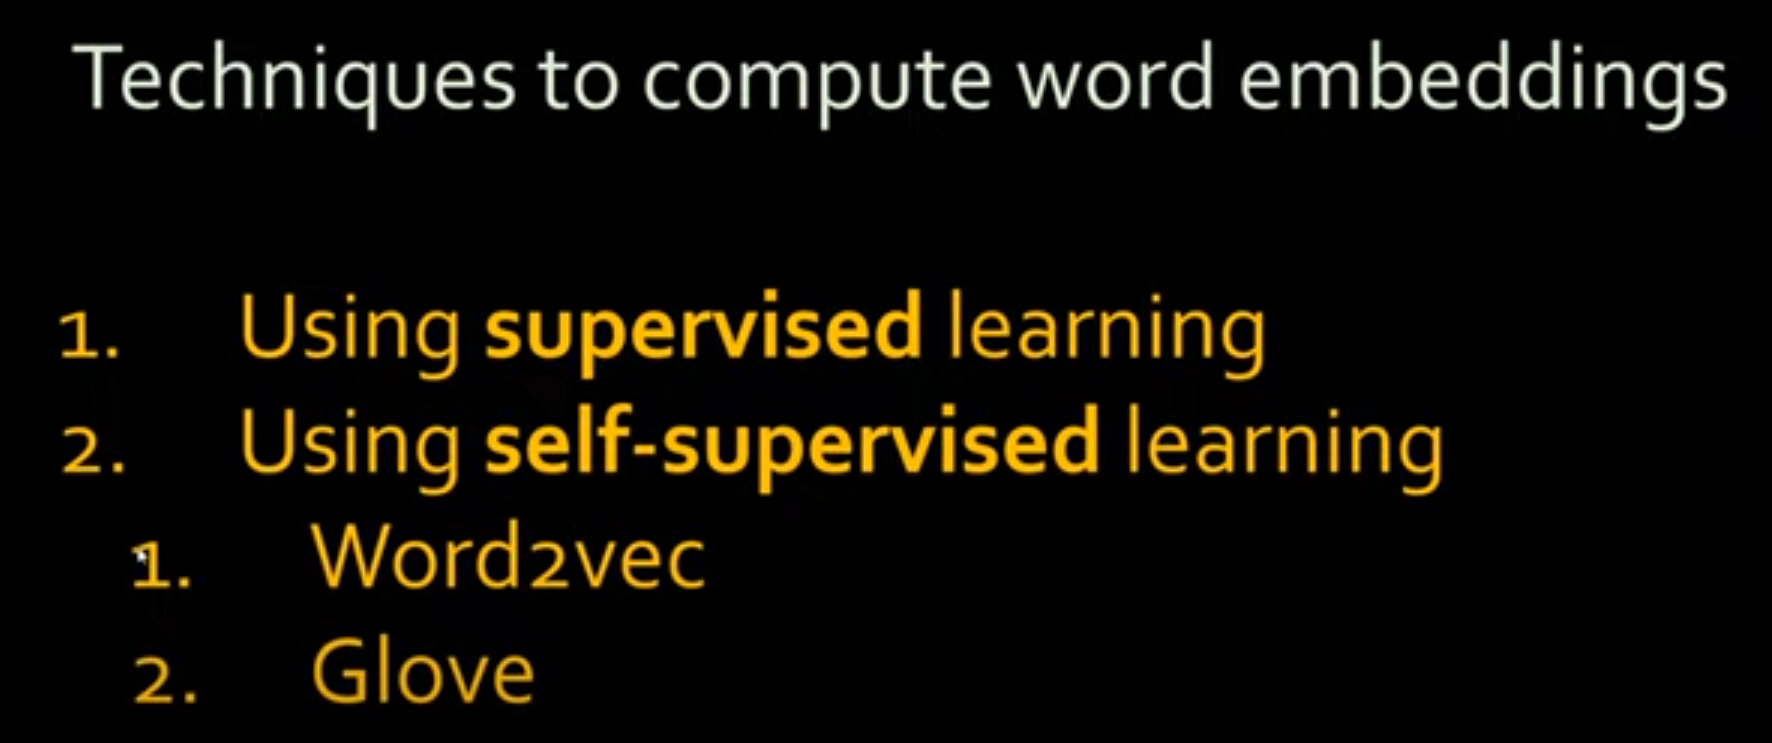

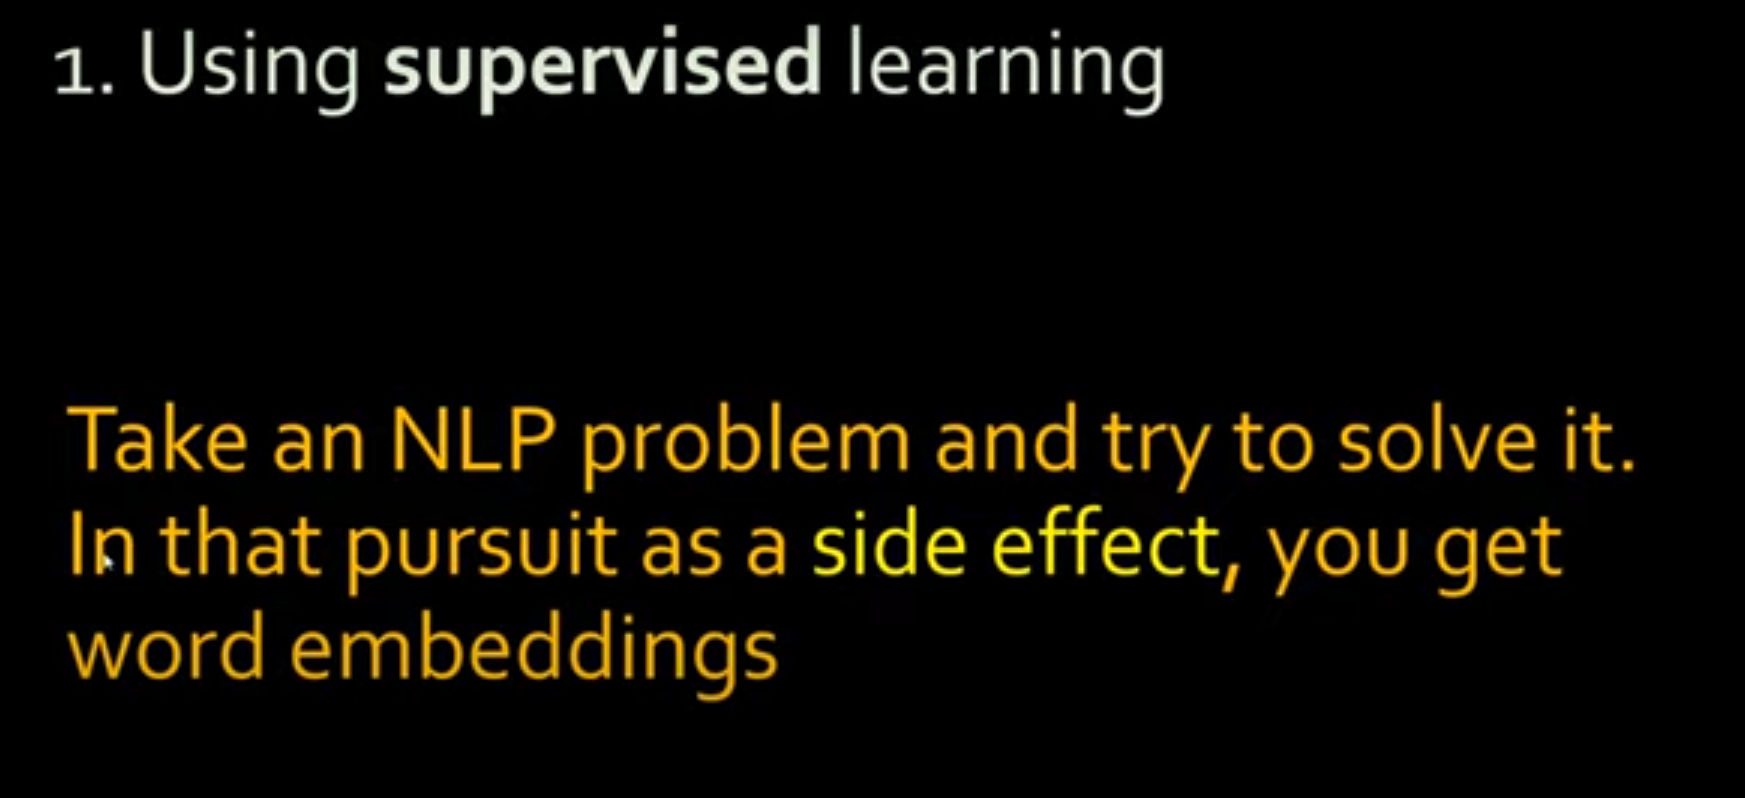

# ***Lets Do some coding***

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/22_word_embedding/'

supervised_word_embeddings.ipynb


In [7]:
e = Embedding(200, 32, input_length=50)

In [9]:
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])

In [10]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[18, 26], [49, 18], [14, 2], [20, 18], [48], [17], [15, 2], [10, 49], [15, 18], [9, 45, 26, 47]]


In [11]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[18 26  0  0]
 [49 18  0  0]
 [14  2  0  0]
 [20 18  0  0]
 [48  0  0  0]
 [17  0  0  0]
 [15  2  0  0]
 [10 49  0  0]
 [15 18  0  0]
 [ 9 45 26 47]]


In [18]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length, name = 'embedding'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              400       
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [23]:
model.get_layer('embedding').get_weights()[0]


array([[ 0.00699487,  0.00619798,  0.0053902 , -0.03610015, -0.04146463,
        -0.01608093, -0.03014064,  0.02012756],
       [ 0.01919049, -0.03720319, -0.03616679, -0.04550489, -0.00465789,
        -0.03646255, -0.01243991, -0.02689936],
       [ 0.01451841, -0.0059181 , -0.01256682, -0.02957385, -0.00568118,
         0.02783209,  0.00393634,  0.03300803],
       [ 0.0418354 ,  0.00044759,  0.04487858, -0.02005401, -0.03864736,
         0.03355854,  0.02239073, -0.02044874],
       [-0.00593177,  0.00959287, -0.04155573,  0.03868023, -0.01460483,
        -0.03623059,  0.02865655, -0.01592775],
       [ 0.0100795 ,  0.0359561 ,  0.03880027, -0.00614917,  0.0068544 ,
         0.00183877,  0.02448859, -0.00400498],
       [-0.03801135, -0.02595516,  0.00035135,  0.04226557,  0.00863967,
         0.02955726, -0.03169874,  0.00867803],
       [ 0.0125258 , -0.04479636,  0.01360127, -0.03259553,  0.01746145,
         0.0466858 , -0.04951117,  0.01648989],
       [-0.02544433,  0.04152172

In [24]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

50

In [25]:
weights[11] # reason why we are getting 8 weights is because in model stage we had given instruction to model to give 8 wieghts

array([-0.0259403 ,  0.00691638, -0.00284534, -0.03032211,  0.01222169,
       -0.01705147, -0.02541034, -0.04299906], dtype=float32)